## 1. Artificial Neural Network (ANN)

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


# Load the Dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


# Length of the Data

print("Length of X Train :",len(x_train))
print("Length of X Test :",len(x_test))
print("Length of Y Train :",len(y_train))
print("Length of Y Test :",len(y_test))


# Shape of the Data

print("\nShape of X Train :",x_train.shape)
print("Shape of X Test :",x_test.shape)
print("Shape of Y Train :",y_train.shape)
print("Shape of Y Test :",y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Length of X Train : 50000
Length of X Test : 10000
Length of Y Train : 50000
Length of Y Test : 10000

Shape of X Train : (50000, 32, 32, 3)
Shape of X Test : (10000, 32, 32, 3)
Shape of Y Train : (50000, 1)
Shape of Y Test : (10000, 1)


In [2]:
# View the Data

print(x_train[0])

print(x_test[1])



# Scale the Data (Ranges between 0 to 255)

x_train = x_train / 255
x_test = x_test / 255


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[235 235 235]
  [231 231 231]
  [232 232 232]
  ...
  [233 233 233]
  [233 233 233]
  [232 232 232]]

 [[238 238 238]
  [235 235 235]
  [235 235 235]
  ...
  [236 236 236]
  [236 236 236]
  [235 235 235]]

 [[237 237 237]
  [234 234 234]
  [234 234 234]
  ...
  [235 235 235]
  [235 235 235]
  [234 234 234]]

 ...

 [[ 87  99  89]
  [ 43  51  37]
  [ 19  23  11]
  ..

In [3]:
# Convert Text to Numbers using One Hot Encoding in the Dataset

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [4]:
# Create a Nueral Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



# Compile

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train

model.fit(x_train, y_train, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2742 - loss: 2.2412
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3916 - loss: 1.6930
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4219 - loss: 1.6117
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4486 - loss: 1.5414
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4676 - loss: 1.4984
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4724 - loss: 1.4726
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4790 - loss: 1.4549
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4931 - loss: 1.4295
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4999 - loss: 1.4021
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5064 - loss: 1.3809
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5105 - loss: 1.3660
Epoch 12/50
1563/1563 ━━━

In [5]:
# Prediction

y_pred = model.predict(x_test)


# Evaluate

Evaluate = model.evaluate(x_test, y_test)
print("Model Evaluation :", Evaluate)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4861 - loss: 1.8369
Model Evaluation : [1.8193812370300293, 0.4821000099182129]


Actual : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

Predicted : 4




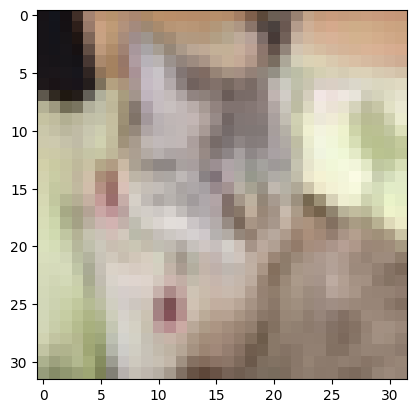

In [10]:
# To Check

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print("Actual :",y_test[8])

print("\nPredicted :",np.argmax(y_pred[8]))

print("\n")

plt.imshow(x_test[8])
plt.show()


## 2. Convolutional Neural Network (CNN)

In [12]:
# Create a Nueral Network


CNN = keras.Sequential([

    # Convolution & Pooling

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),


    # Dense Lyers

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



# Compile

CNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Train

CNN.fit(x_train, y_train, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4097 - loss: 1.6148
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6631 - loss: 0.9572
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7617 - loss: 0.6883
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8353 - loss: 0.4697
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9018 - loss: 0.2796
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9428 - loss: 0.1679
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9604 - loss: 0.1168
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.0926
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9713 - loss: 0.0867
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9758 - loss: 0.0743
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9788 - loss: 0.0682
Epoch 12/50
1563/1563 ━━

In [13]:
# Evalutae

Evaluate = CNN.evaluate(x_test, y_test)
print("Model Evaluation :", Evaluate)



# Predict

Cnn_pred = CNN.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6803 - loss: 4.7702
Model Evaluation : [4.806272029876709, 0.679099977016449]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


Actual : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Predicted : 6




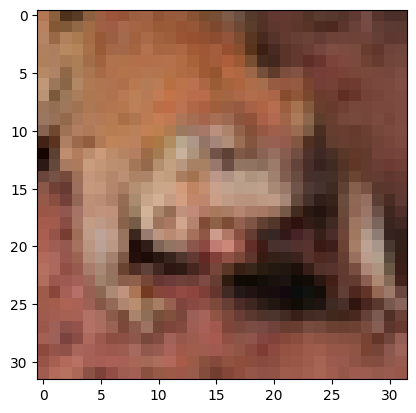

In [16]:
# To Check

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print("Actual :",y_test[5])

print("\nPredicted :",np.argmax(Cnn_pred[5]))

print("\n")

plt.imshow(x_test[5])
plt.show()


In [18]:
# Classification Report

print(classification_report(np.argmax(y_test, axis=1), np.argmax(Cnn_pred, axis=1)))


# Confusion Matrix

Cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(Cnn_pred, axis=1))
print("\nConfusion Matrix :")
print(Cm)


              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.86      0.80      0.83      1000
           2       0.56      0.61      0.58      1000
           3       0.48      0.47      0.47      1000
           4       0.69      0.53      0.60      1000
           5       0.49      0.68      0.57      1000
           6       0.75      0.75      0.75      1000
           7       0.70      0.73      0.72      1000
           8       0.86      0.72      0.79      1000
           9       0.76      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000


Confusion Matrix :
[[731  18  52  43  21  24  11  21  40  39]
 [ 13 803  14  12   3  23  16   9  16  91]
 [ 47   5 606  71  53 102  48  45  10  13]
 [ 16   7  91 469  46 246  58  49   4  14]
 [ 21   3  96  97 529  88  63  87  11   5]
 [  6 

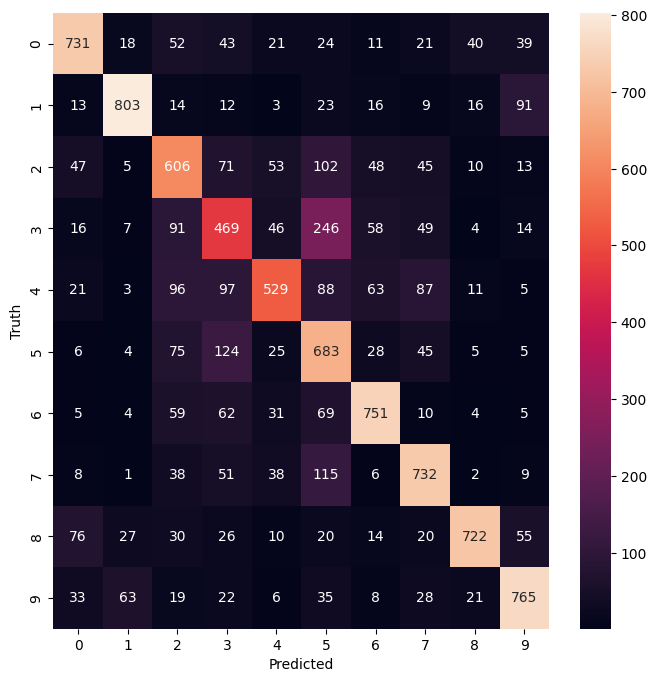

In [20]:
# Plot

plt.figure(figsize=(8,8))
sn.heatmap(Cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
